<a href="https://colab.research.google.com/github/Sakthirajan135/Bootstrap/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FOOD_REVIEW/Restaurant reviews.csv')

In [ ]:
print(df.shape)
df = df.head(500)
print(df.shape)

(10000, 8)
(500, 8)


In [ ]:
df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


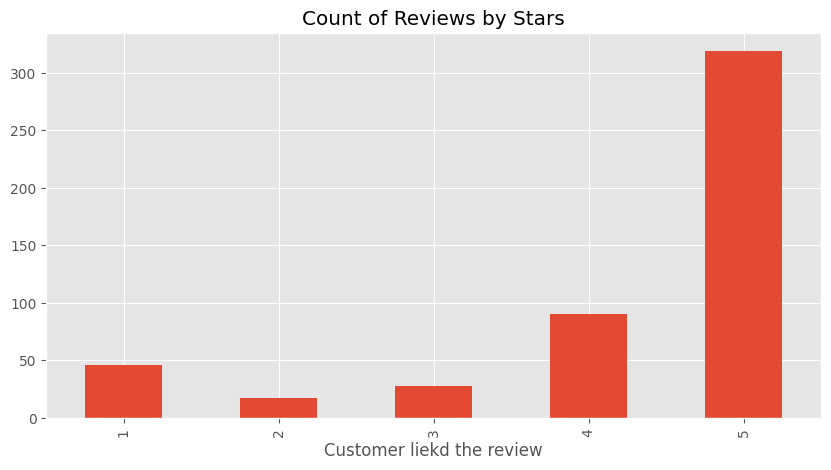

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Customer liekd the review')
plt.show()

In [ ]:
import nltk

# Download the 'punkt_tab' data package for tokenization model
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
example = df['Review'][50]
print(example)


Pradeep and shubroto were amazing and friendly. Service was awesome n food out of the world.must visit for all people out there. Will visit again


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Pradeep',
 'and',
 'shubroto',
 'were',
 'amazing',
 'and',
 'friendly',
 '.',
 'Service',
 'was']

In [ ]:
import nltk

# Download the 'averaged_perceptron_tagger_eng' data package
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Pradeep', 'NNP'),
 ('and', 'CC'),
 ('shubroto', 'NN'),
 ('were', 'VBD'),
 ('amazing', 'JJ'),
 ('and', 'CC'),
 ('friendly', 'JJ'),
 ('.', '.'),
 ('Service', 'NNP'),
 ('was', 'VBD')]

In [ ]:
import nltk

# Download the required data package
nltk.download('maxent_ne_chunker_tab')


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [ ]:
import nltk

# Download the 'words' data package for named entity recognition
nltk.download('words')



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  (GPE Pradeep/NNP)
  and/CC
  shubroto/NN
  were/VBD
  amazing/JJ
  and/CC
  friendly/JJ
  ./.
  (PERSON Service/NNP)
  was/VBD
  awesome/JJ
  n/RB
  food/NN
  out/IN
  of/IN
  the/DT
  world.must/JJ
  visit/NN
  for/IN
  all/DT
  people/NNS
  out/RP
  there/RB
  ./.
  Will/MD
  visit/VB
  again/RB)


In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('worst food')

{'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.9022}

In [ ]:
sia.polarity_scores('Food was very amazing')

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.624}

In [ ]:
sia.polarity_scores('taste little bit nice')

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.3657}

In [ ]:
sia.polarity_scores('the food is delicious')

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [ ]:
sia.polarity_scores('the food is avaerage')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores('the services is not good')

{'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}

In [ ]:
sia.polarity_scores('Very good ambience, amazing food ,good service and friendly staff')

{'neg': 0.0, 'neu': 0.305, 'pos': 0.695, 'compound': 0.928}

In [ ]:
sia.polarity_scores('food was amazing')

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}

In [ ]:
sia.polarity_scores('it was nice experience')

{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

In [ ]:
sia.polarity_scores('it was waiting is disappointment')

{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5106}

In [4]:
sia.polarity_scores('No that good when compared to Tolichowki branch..')

{'neg': 0.198, 'neu': 0.541, 'pos': 0.261, 'compound': 0.1779}